# How to create basic time series plots

In [1]:
import pandas_datareader.data as web

In [2]:
df = web.DataReader("AAPL", 'yahoo', '2018/11/1', '2019/11/1') 

In [3]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-11-01,222.360001,216.809998,219.050003,222.220001,58323200.0,218.169342
2018-11-02,213.649994,205.429993,209.550003,207.479996,91328700.0,203.697998
2018-11-05,204.389999,198.169998,204.300003,201.589996,66163700.0,197.915375
2018-11-06,204.720001,201.690002,201.919998,203.770004,31882900.0,200.055649
2018-11-07,210.059998,204.130005,205.970001,209.949997,33424400.0,206.122986


In [4]:
%matplotlib inline

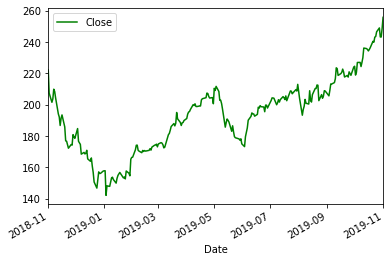

In [5]:
df.plot(y="Close", color="Green")

# UK Crash Data Analysis

In [12]:
import csv
import pandas as pd
df = pd.read_csv('2019_Acc_46747.csv')
print(df)

      Accident_Index       Status  Location_Easting_OSGR  \
0           2.02E+12  Unvalidated                 404831   
1           2.02E+12  Unvalidated                 369332   
2           2.02E+12  Unvalidated                 401303   
3           2.02E+12  Unvalidated                 413217   
4           2.02E+12  Unvalidated                 401194   
5      201960X005430  Unvalidated                 338332   
6      201960X018995  Unvalidated                 296350   
7      201960X022053  Unvalidated                 314089   
8      201960X024302  Unvalidated                 302512   
9      201960X025372  Unvalidated                 316670   
10     201960X035144  Unvalidated                 306400   
11     201960X049839  Unvalidated                 305868   
12     201960X058241  Unvalidated                 280541   
13     201960X066260  Unvalidated                 238042   
14     201960X081746  Unvalidated                 272984   
15     201960X086492  Unvalidated       

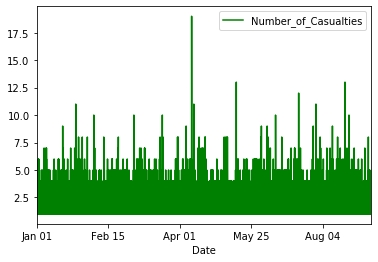

In [13]:
%matplotlib inline
# import datetime
from datetime import datetime

#Convert string into date format
df["Date"] = pd.to_datetime(df["Date"]).dt.date
# Sort the date
df = df.sort_values(by="Date")
# Convert date to Month Day format. https://strftime.org/
df["Date"] = pd.to_datetime(df["Date"]).dt.strftime("%b %d")
df.plot(y="Number_of_Casualties", x = "Date", color="Green")

# Bar Plots

In [100]:
import csv
import pandas
df = pandas.read_csv('02-14-2020_1123.csv')
dfNew = df.dropna() 

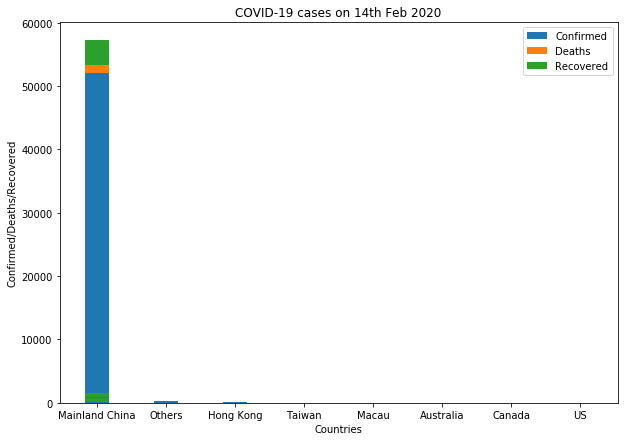

                Confirmed  Recovered  Deaths
Country/Region                              
Australia              15          8       0
Canada                  7          1       0
Hong Kong              56          1       1
Macau                  10          3       0
Mainland China      63866       7086    1381
Others                218          0       0
Taiwan                 18          2       0
US                     15          3       0


In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from textwrap import wrap

countries = dfNew.iloc[:,1]
barConfirmed = dfNew.iloc[:,3]
barDeaths = dfNew.iloc[:,4]
barRecovered = dfNew.iloc[:,5]
#index = np.arange(len(dfNew))
plt.figure(figsize = (10, 7))
graphConfirmed = plt.bar(x=countries, height = barConfirmed, width = 0.35)
graphDeaths = plt.bar(x=countries, height = barDeaths, width = 0.35, bottom = barConfirmed)
graphRecovered = plt.bar(x=countries, height = barRecovered, width = 0.35, bottom = barConfirmed+barDeaths)

#Create labels
plt.xlabel('Countries')
plt.ylabel('Confirmed/Deaths/Recovered')
plt.title('COVID-19 cases on 14th Feb 2020')
plt.legend((graphConfirmed,graphDeaths,graphRecovered), ('Confirmed','Deaths','Recovered'), loc = "upper right")

plt.show()



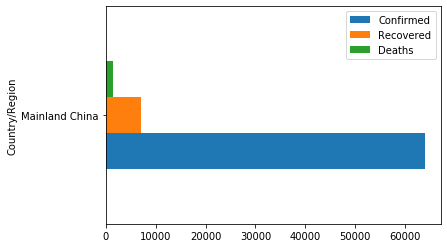

In [115]:
#print the total confirmed cases of Mainland China
#print(dfNew[['Country/Region','Confirmed']].where(dfNew['Country/Region'] == 'Mainland China').sum())

#print the total recovered cases in Mainland China
#print(dfNew[['Country/Region','Recovered']].where(dfNew['Country/Region'] == 'Mainland China').sum())

data = dfNew[['Country/Region','Confirmed','Recovered','Deaths']]

data = dfNew[['Country/Region','Confirmed','Recovered','Deaths']].where(dfNew['Country/Region'] == 'Mainland China')
data.groupby('Country/Region')['Confirmed','Recovered','Deaths'].sum().plot.barh()


# Kernel density plots and Time Series Plots

In [15]:
import csv
import pandas
tsData = pandas.read_csv('time_series_19-covid-Confirmed_archived_0325.csv')

In [3]:
tsData

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,238,428,566,673,790,900,1030,1183,1306,1306.0
5,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,64,73,103,103,186,231,271,424,424,424.0
6,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,112,134,171,210,267,307,353,436,533,533.0
7,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,49,57,71,94,121,121,121,229,296,296.0
8,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,46,61,68,78,94,144,184,221,221,221.0
9,NaN,Cambodia,11.5500,104.9167,0,0,0,0,0,1,...,7,7,7,33,35,37,51,53,84,84.0


In [2]:
tsData.shape

(501, 66)

In [3]:
tsData.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
1/23/20             int64
1/24/20             int64
1/25/20             int64
1/26/20             int64
1/27/20             int64
1/28/20             int64
1/29/20             int64
1/30/20             int64
1/31/20             int64
2/1/20              int64
2/2/20              int64
2/3/20              int64
2/4/20              int64
2/5/20              int64
2/6/20              int64
2/7/20              int64
2/8/20              int64
2/9/20              int64
2/10/20             int64
2/11/20             int64
2/12/20             int64
2/13/20             int64
2/14/20             int64
2/15/20             int64
2/16/20             int64
                   ...   
2/23/20             int64
2/24/20             int64
2/25/20             int64
2/26/20             int64
2/27/20             int64
2/28/20             int64
2/29/20             int64
3/1/20      

In [16]:
tsData.drop(tsData.columns[[2,3]],inplace = True, axis = 1) ## Dropped columns of no relevance

In [17]:
tsData.loc[~(tsData==0).any(axis=1)] ## Removed zero entries

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,2,3,5,7,8,8,14,14,...,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,2,1,2,2,4,4,7,7,...,773,839,825,878,889,924,963,1007,1086,1086.0
154,Hubei,China,444,444,549,761,1058,1423,3554,3554,...,67790,67794,67798,67799,67800,67800,67800,67800,67800,67800.0
156,NaN,"Korea, South",1,1,2,2,3,4,4,4,...,8086,8162,8236,8320,8413,8565,8652,8799,8897,8897.0
158,Guangdong,China,26,32,53,78,111,151,207,277,...,1356,1360,1361,1364,1370,1378,1395,1400,1407,1413.0
159,Henan,China,5,5,9,32,83,128,168,206,...,1273,1273,1273,1273,1273,1273,1273,1273,1273,1274.0
160,Zhejiang,China,10,27,43,62,104,128,173,296,...,1227,1231,1231,1232,1232,1233,1234,1236,1237,1238.0
161,Hunan,China,4,9,24,43,69,100,143,221,...,1018,1018,1018,1018,1018,1018,1018,1018,1018,1018.0
162,Anhui,China,1,9,15,39,60,70,106,152,...,990,990,990,990,990,990,990,990,990,990.0
163,Jiangxi,China,2,7,18,18,36,72,109,109,...,935,935,935,935,935,935,935,935,936,936.0


[Text(0.5, 0, '2/9/20')]

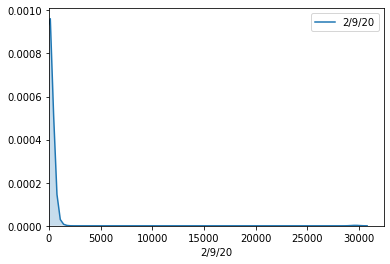

In [18]:
import seaborn as sns
# Kernel Density Estimate Plot
g = sns.kdeplot(tsData.iloc[:,20], shade=True)
g.set(xlim=(0, None))
g.set(xlabel = tsData.columns[20])

[(0, 2446.7722335653198)]

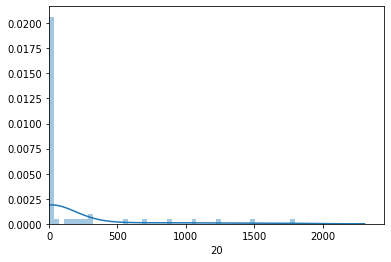

In [22]:
g = sns.distplot(tsData.iloc[20,2:60])
g.set(xlim=(0, None))

# Animated time series plot https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

overdoses = pd.read_excel('overdose_data_1999-2015.xls',sheet_name='Online',skiprows =6)
def get_data(table,rownum,title):
    data = pd.DataFrame(table.loc[rownum][2:]).astype(float)
    data.columns = {title}
    return data

In [4]:
%matplotlib notebook
title = 'Heroin Overdoses'
d = get_data(overdoses,18,title)
x = np.array(d.index)
y = np.array(d['Heroin Overdoses'])
overdose = pd.DataFrame(y,x)
overdose.columns = {title}
overdose.dtypes

Heroin Overdoses    float64
dtype: object

In [15]:
# To install ffmpeg, use 'conda install -c conda-forge ffmpeg' in Anaconda prompt
Writer = animation.writers['ffmpeg']
writer = Writer(fps=10, metadata=dict(artist='Me'), bitrate=1800)

In [16]:
print(animation.writers.list())

['pillow', 'ffmpeg', 'ffmpeg_file', 'html']


<IPython.core.display.Javascript object>


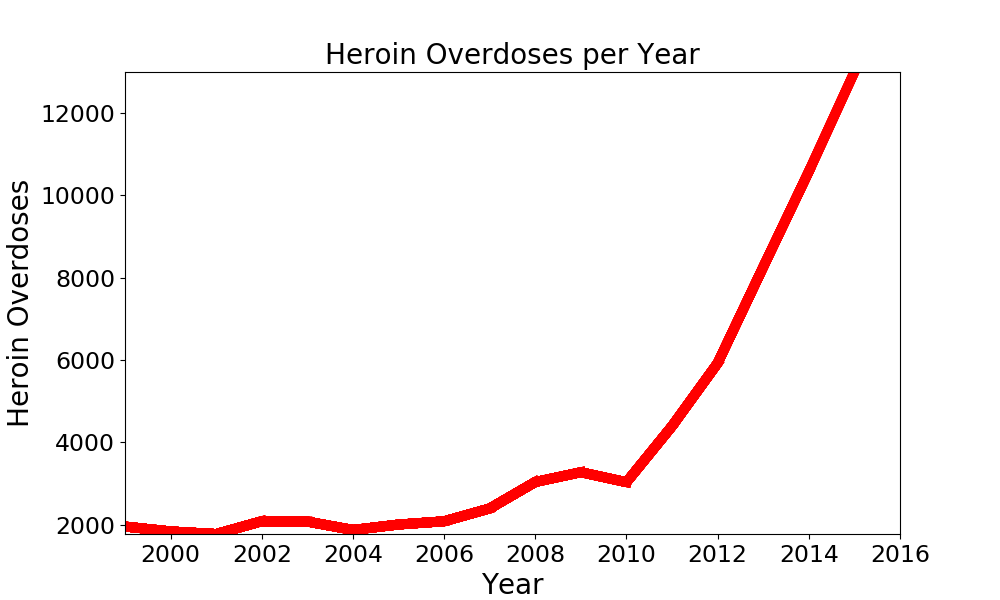

In [17]:
fig = plt.figure(figsize=(10,6))
plt.xlim(1999, 2016)
plt.ylim(np.min(overdose)[0], np.max(overdose)[0])
plt.xlabel('Year',fontsize=20)
plt.ylabel(title,fontsize=20)
plt.title('Heroin Overdoses per Year',fontsize=20)
##
def animate(i):
    data = overdose.iloc[:int(i+1)] #select data range
    p = sns.lineplot(x=data.index, y=data[title], data=data, color="r")
    p.tick_params(labelsize=17)
    plt.setp(p.lines,linewidth=7)


In [18]:
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=17, repeat=True)

In [19]:
ani.save('HeroinOverdosesJumpy.mp4', writer=writer)

In [20]:
from IPython.display import Video
Video('HeroinOverdosesJumpy.mp4')

# Seaborn vs Matplotlib

In [5]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

In [6]:
# create some random data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

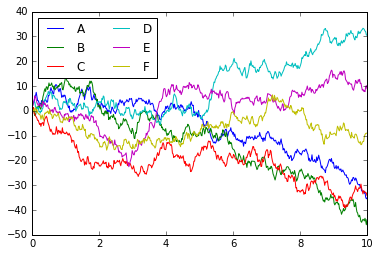

In [7]:
# Make a simple plot with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

# Let us see how it works with Seaborn

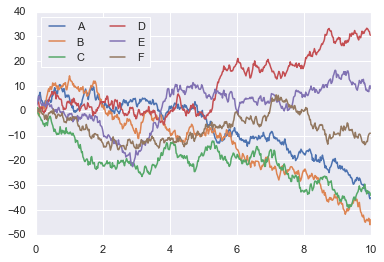

In [8]:
import seaborn as sns
sns.set()
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [14]:
# More will comtinue in next lab